In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import os
from sklearn import datasets
from sklearn.model_selection import train_test_split

#print(os.path.exists("../input/enron-sample"))
#print(os.path.exists("../input/sampledata/sample"))
#data = datasets.load_files ('../input/sampledata/sample/sample')
data = datasets.load_files('enron_with_categories',encoding='utf-8')
for keys in data.keys() :
    print(keys)
print(list(data.target_names))
print(len(data.data))

data
filenames
target_names
target
DESCR
['1', '2', '3', '4', '5', '6']
1663


In [3]:
df = pd.DataFrame(data.data)
df["Email"] = df


In [4]:
print(df.loc[1][0])

Message-ID: <16695482.1075846172580.JavaMail.evans@thyme>
Date: Fri, 1 Sep 2000 04:25:00 -0700 (PDT)
From: steven.kean@enron.com
To: terence.thorn@enron.com
Subject: Linda Jenkins on "Jerry's Show" Monday
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Steven J Kean
X-To: Terence H Thorn
X-cc: 
X-bcc: 
X-Folder: \Steven_Kean_Dec2000_1\Notes Folders\All documents
X-Origin: KEAN-S
X-FileName: skean.nsf

fyi
---------------------- Forwarded by Steven J Kean/NA/Enron on 09/01/2000 
11:24 AM ---------------------------

           Public Relations	
	

From: public-relations on 09/01/2000 10:42 AM
Sent by: Public Relations
To: All Enron Houston
cc:  
Subject: Linda Jenkins on "Jerry's Show" Monday


 What are you doing on Labor Day? 
 
In between the hamburgers, hotdogs, homemade ice cream and occasional dip in 
the pool that many of you will undoubtedly be enjoying Monday, be sure to 
take a few minutes to turn your TV set to the Jerry Le

In [5]:
import email
message = df.loc[1][0]

e = email.message_from_string(message)

e.items()

[('Message-ID', '<16695482.1075846172580.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 1 Sep 2000 04:25:00 -0700 (PDT)'),
 ('From', 'steven.kean@enron.com'),
 ('To', 'terence.thorn@enron.com'),
 ('Subject', 'Linda Jenkins on "Jerry\'s Show" Monday'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Steven J Kean'),
 ('X-To', 'Terence H Thorn'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', '\\Steven_Kean_Dec2000_1\\Notes Folders\\All documents'),
 ('X-Origin', 'KEAN-S'),
 ('X-FileName', 'skean.nsf')]

In [6]:
e.get_payload()

'fyi\n---------------------- Forwarded by Steven J Kean/NA/Enron on 09/01/2000 \n11:24 AM ---------------------------\n\n           Public Relations\t\n\t\n\nFrom: public-relations on 09/01/2000 10:42 AM\nSent by: Public Relations\nTo: All Enron Houston\ncc:  \nSubject: Linda Jenkins on "Jerry\'s Show" Monday\n\n\n What are you doing on Labor Day? \n \nIn between the hamburgers, hotdogs, homemade ice cream and occasional dip in \nthe pool that many of you will undoubtedly be enjoying Monday, be sure to \ntake a few minutes to turn your TV set to the Jerry Lewis Labor Day Muscular \nDystrophy (MDA) Telethon on NBC.  At 1:10 p.m., Enron\'s own Linda Jenkins \nwill present a $100,000 check to Jerry\'s Houston team.  The donation, which \nwill benefit research for ALS (amyotrophic lateral sclerosis, also known as \nLou Gehrig\'s disease -- the disease Linda has been living with for the past \nthree years), was raised by devoted friends and volunteers at the Enron/MDA \nBeach Bowl held in J

In [7]:
def get_body(messages):
    colum = []
    for message in messages:
        e = email.message_from_string(message)
        colum.append(e.get_payload())
    return colum

In [8]:
def get_subject(messages):
    colum = []
    for message in messages:
        e = email.message_from_string(message)
        colum.append(e.get("Subject"))
    return colum

In [9]:
df["Subject"] = get_subject(df[0])
df["Body"]= get_body(df[0])
df["Class"] = data.target
df.drop([0],axis=1, inplace=True)

In [10]:
df

,Email,Subject,Body,Class
0,Message-ID: <24608565.1075846140162.JavaMail.e...,"Regulatory Roundtable, in 49C2",\nKRTH? 9:10 - 9:55 JP Pritchard 630-3600,3
1,Message-ID: <16695482.1075846172580.JavaMail.e...,"Linda Jenkins on ""Jerry's Show"" Monday",fyi\n---------------------- Forwarded by Steve...,0
2,Message-ID: <569949.1075846177167.JavaMail.eva...,Re: Update -- Project 100,It's fine with me.\n\n\n\n\tMary Clark\n\t09/2...,0
3,Message-ID: <20011465.1075847624589.JavaMail.e...,Re: Senator Feinstein,yes\n\n\n\n\tLinda Robertson\n\t03/01/2001 07:...,0
4,Message-ID: <4856988.1075849868022.JavaMail.ev...,Re: PJM RTO Order,Great summary. I think the two main issues yo...,5
...,...,...,...,...
1658,Message-ID: <11414081.1075846150067.JavaMail.e...,Fwd: Anti-motivational pictures.,---------------------- Forwarded by Steven J K...,1
1659,Message-ID: <23493481.1075847582778.JavaMail.e...,,I'd be happy to call Nickles.,3
1660,Message-ID: <10469240.1075863429356.JavaMail.e...,RE: ENE candlestick chart,Greetings from London.\nWhat do you think abou...,5
1661,Message-ID: <16275256.1075849874488.JavaMail.e...,White House To Support FERC Action Today,"According to this morning's Washington Post, t...",0


In [11]:
df['Class'].value_counts()

0    834
3    476
5    143
2    100
4     74
1     36
Name: Class, dtype: int64

In [12]:
# checking For null
df.isnull().sum()

Email      0
Subject    0
Body       0
Class      0
dtype: int64

In [13]:
# checking for duplicates
df.duplicated().sum()

0

In [14]:
df['text'] = df['Subject'] + " " + df['Body']

In [15]:
# drop the columns 'subject' and 'body'
df.drop(['Subject','Body','Email'], axis=1, inplace=True)

In [16]:
# checking for duplicates again
df.duplicated().sum()

47

In [17]:
# dropping duplicates 
df.drop_duplicates(keep='first')

,Class,text
0,3,"Regulatory Roundtable, in 49C2 \nKRTH? 9:10 - ..."
1,0,"Linda Jenkins on ""Jerry's Show"" Monday fyi\n--..."
2,0,Re: Update -- Project 100 It's fine with me.\n...
3,0,Re: Senator Feinstein yes\n\n\n\n\tLinda Rober...
4,5,Re: PJM RTO Order Great summary. I think the ...
...,...,...
1658,1,Fwd: Anti-motivational pictures. -------------...
1659,3,I'd be happy to call Nickles.
1660,5,RE: ENE candlestick chart Greetings from Londo...
1661,0,White House To Support FERC Action Today Accor...


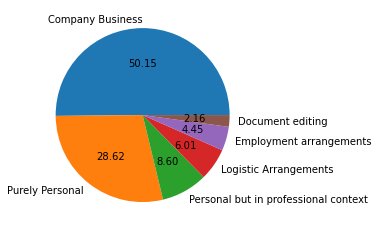

In [18]:
# checking class distribution
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(), labels=['Company Business','Purely Personal','Personal but in professional context' ,'Logistic Arrangements','Employment arrangements','Document editing'], autopct='%0.2f')
plt.show()

### Data is Imbalanced

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# getting number of characters 
df['num_characters'] = df['text'].apply(len)
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,Class,text,num_characters,num_words
0,3,"Regulatory Roundtable, in 49C2 \nKRTH? 9:10 - ...",71,13
1,0,"Linda Jenkins on ""Jerry's Show"" Monday fyi\n--...",1145,238
2,0,Re: Update -- Project 100 It's fine with me.\n...,912,188
3,0,Re: Senator Feinstein yes\n\n\n\n\tLinda Rober...,516,98
4,5,Re: PJM RTO Order Great summary. I think the ...,3277,570


In [22]:
# getting number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1663.00000,1663.000000,1663.000000
mean,6903.27721,1290.043295,40.431149
std,24439.43850,4562.487832,152.085676
min,9.00000,2.000000,1.000000
25%,623.00000,124.000000,4.000000
50%,1398.00000,279.000000,9.000000
75%,2867.00000,548.000000,18.000000
max,229271.00000,43340.000000,2111.000000


<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

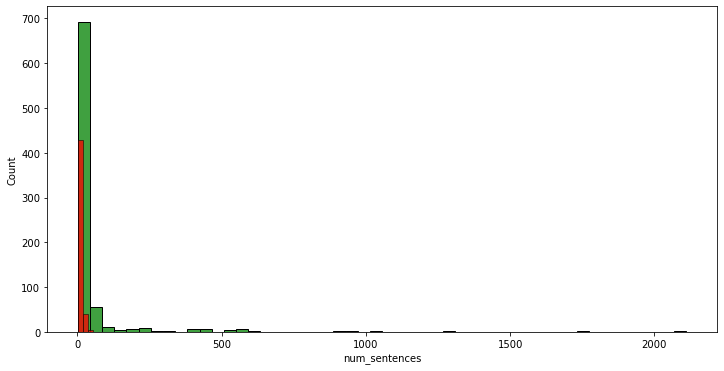

In [24]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['num_sentences'], color='green',bins=50)
sns.histplot(df[df['Class'] == 3]['num_sentences'],color='red',bins=50)

In [25]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(lm.lemmatize(i))        
    return " ".join(y)

In [26]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Atul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Atul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
import re
def preprocess(x):
    x = re.sub(r'[^a-zA-Z]',' ', x)
    # lowercasing all the words
    x = x.lower()
    # remove extra new lines
    x = re.sub(r'\n+', ' ', x)
    
    # removing (replacing with empty spaces actually) all the punctuations
    x = re.sub("["+string.punctuation+"]"," ", x)
    

    
    return x

In [28]:
df.loc[:,'text'] = df.loc[:,'text'].map(preprocess)

In [29]:
df.head()

,Class,text,num_characters,num_words,num_sentences
0,3,regulatory roundtable in c krth ...,71,13,2
1,0,linda jenkins on jerry s show monday fyi ...,1145,238,6
2,0,re update project it s fine with me ...,912,188,10
3,0,re senator feinstein yes linda robertson ...,516,98,6
4,5,re pjm rto order great summary i think the ...,3277,570,11


In [30]:
from nltk.stem import WordNetLemmatizer 
lm = WordNetLemmatizer()
df['transformed_text'] = df['text'].apply(transform_text)

In [31]:
df.head()

,Class,text,num_characters,num_words,num_sentences,transformed_text
0,3,regulatory roundtable in c krth ...,71,13,2,regulatory roundtable c krth jp pritchard
1,0,linda jenkins on jerry s show monday fyi ...,1145,238,6,linda jenkins jerry show monday fyi forwarded ...
2,0,re update project it s fine with me ...,912,188,10,update project fine mary clark steven j kean n...
3,0,re senator feinstein yes linda robertson ...,516,98,6,senator feinstein yes linda robertson steven j...
4,5,re pjm rto order great summary i think the ...,3277,570,11,pjm rto order great summary think two main iss...


In [32]:
company_corpus = []
for msg in df[df['Class'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        company_corpus.append(word)

In [33]:
len(company_corpus)

890232

C:\Users\Atul\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


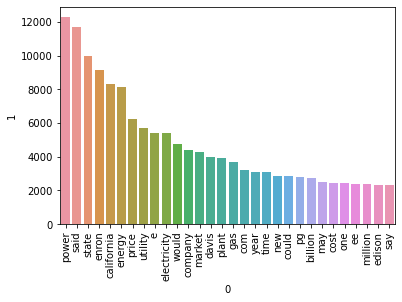

In [34]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(company_corpus).most_common(30))[0],pd.DataFrame(Counter(company_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Atul\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


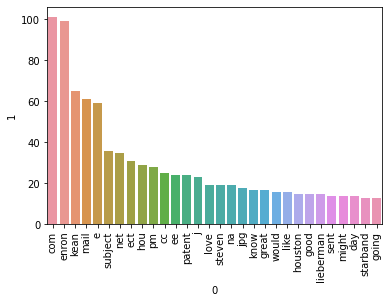

In [35]:
company_corpus = []
for msg in df[df['Class'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        company_corpus.append(word)
sns.barplot(pd.DataFrame(Counter(company_corpus).most_common(30))[0],pd.DataFrame(Counter(company_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Atul\anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


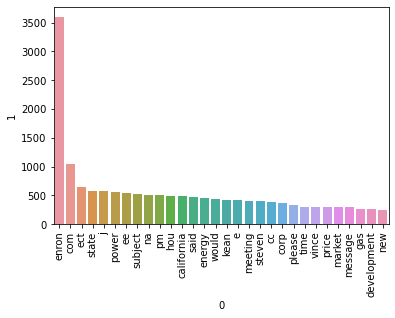

In [36]:
company_corpus = []
for msg in df[df['Class'] == 3]['transformed_text'].tolist():
    for word in msg.split():
        company_corpus.append(word)
sns.barplot(pd.DataFrame(Counter(company_corpus).most_common(30))[0],pd.DataFrame(Counter(company_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building 

In [37]:
X=df['transformed_text']
y=df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(len(y_train))
print(len(y_test))


1330
333


In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
vectorizer = TfidfVectorizer(max_features=10000)
vectortrain = vectorizer.fit_transform(X_train).toarray()
vectortrain.shape

(1330, 10000)

In [39]:
vectortest = vectorizer.transform(X_test).toarray()

In [40]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
gnb = GaussianNB()
mnb = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
bnb = BernoulliNB()

In [41]:
gnb.fit(vectortrain, y_train)
pred = gnb.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.6216216216216216
              precision    recall  f1-score   support

           1       0.66      0.88      0.75       179
           2       0.50      0.33      0.40         6
           3       0.21      0.21      0.21        14
           4       0.62      0.37      0.47        94
           5       0.60      0.21      0.32        14
           6       0.44      0.27      0.33        26

    accuracy                           0.62       333
   macro avg       0.51      0.38      0.41       333
weighted avg       0.61      0.62      0.59       333



In [42]:
mnb.fit(vectortrain, y_train)
pred = mnb.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.7147147147147147
              precision    recall  f1-score   support

           1       0.80      0.84      0.82       179
           2       1.00      0.33      0.50         6
           3       0.14      0.14      0.14        14
           4       0.64      0.71      0.68        94
           5       0.67      0.29      0.40        14
           6       0.65      0.50      0.57        26

    accuracy                           0.71       333
   macro avg       0.65      0.47      0.52       333
weighted avg       0.72      0.71      0.71       333



In [43]:
bnb.fit(vectortrain, y_train)
pred = bnb.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.4444444444444444
              precision    recall  f1-score   support

           1       0.93      0.28      0.43       179
           2       1.00      0.17      0.29         6
           3       0.00      0.00      0.00        14
           4       0.36      0.99      0.53        94
           5       0.00      0.00      0.00        14
           6       0.22      0.15      0.18        26

    accuracy                           0.44       333
   macro avg       0.42      0.26      0.24       333
weighted avg       0.63      0.44      0.40       333



In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf.fit(vectortrain, y_train)
pred = rf.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))


0.7147147147147147
              precision    recall  f1-score   support

           1       0.71      0.91      0.80       179
           2       1.00      0.33      0.50         6
           3       0.33      0.14      0.20        14
           4       0.73      0.67      0.70        94
           5       1.00      0.21      0.35        14
           6       0.62      0.19      0.29        26

    accuracy                           0.71       333
   macro avg       0.73      0.41      0.47       333
weighted avg       0.71      0.71      0.68       333



In [45]:

penalized = RandomForestClassifier(n_estimators = 200, 
                               class_weight='balanced', # penalize
                               random_state = 42)
# Train the model on training data
penalized.fit(vectortrain, y_train)
pred = penalized.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.7327327327327328
              precision    recall  f1-score   support

           1       0.73      0.91      0.81       179
           2       1.00      0.33      0.50         6
           3       0.43      0.21      0.29        14
           4       0.75      0.71      0.73        94
           5       1.00      0.29      0.44        14
           6       0.60      0.23      0.33        26

    accuracy                           0.73       333
   macro avg       0.75      0.45      0.52       333
weighted avg       0.73      0.73      0.71       333



In [50]:

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [51]:
svc = SVC(kernel='poly')
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=100, random_state=2)
abc = AdaBoostClassifier(n_estimators=100, random_state=2)
xgb = XGBClassifier(n_estimators=100,random_state=2)

In [52]:
clfs = {
    'SVC' : svc, 
    'NB': mnb,  
    'RF': rfc, 
    'AdaBoost': abc, 
    'xgb':xgb
}

In [53]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy


In [54]:
for name,clf in clfs.items():
    accuracy = train_classifier(clf,vectortrain, y_train,vectortest,y_test)
    
    print("For ",name)
    print("Accuracy: ",accuracy)


For  SVC
Accuracy:  0.6186186186186187
For  NB
Accuracy:  0.6156156156156156
For  RF
Accuracy:  0.7237237237237237
For  AdaBoost
Accuracy:  0.5015015015015015
For  xgb
Accuracy:  0.7207207207207207


In [55]:
cv= CountVectorizer(ngram_range=(1,2),max_features=10000)
vectortrain1 = cv.fit_transform(X_train).toarray()
vectortest1 = vectorizer.transform(X_test).toarray()
vectortrain1.shape

(1330, 10000)

In [56]:
mnb1 = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
mnb1.fit(vectortrain1, y_train)
pred = mnb1.predict(vectortest1)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.5435435435435435
              precision    recall  f1-score   support

           1       0.54      1.00      0.70       179
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        14
           4       0.67      0.02      0.04        94
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        26

    accuracy                           0.54       333
   macro avg       0.20      0.17      0.12       333
weighted avg       0.48      0.54      0.39       333



C:\Users\Atul\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atul\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atul\anaconda33\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
!pip install imblearn


Defaulting to user installation because normal site-packages is not writeable


In [59]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(vectortrain, y_train)
pred = classifier.predict(vectortest)
print(accuracy_score(y_test, pred))


ModuleNotFoundError: No module named 'imblearn'

## Data Augmentation

In [1]:
import nlpaug.augmenter.word.context_word_embs as aug
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

ModuleNotFoundError: No module named 'nlpaug'